This notebook is made to accompany my senior thesis. Here, you can follow the examples illustrated in my thesis, and see the output of the aforementioned code snippets for yourself. 

### Generating our function

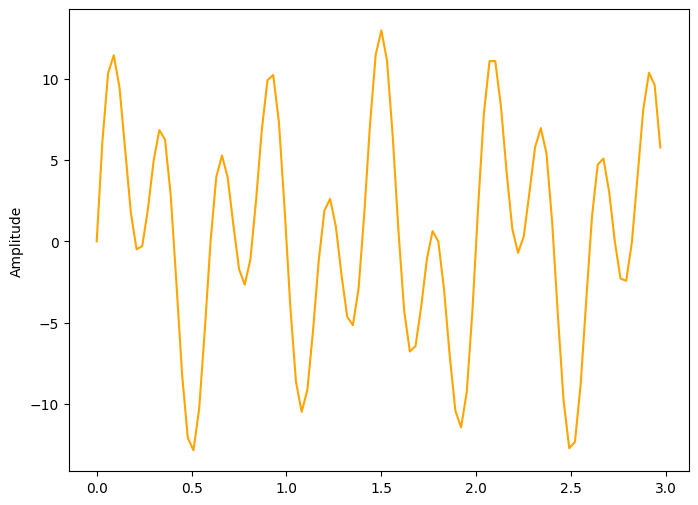

In [18]:
import matplotlib.pyplot as plt
import numpy as np

start = 0 #start of our interval
stop = 3 #end of our interval
samples = 100 #number of points we are sampling in our given interval
f = (stop - start)/samples #space between two sampled points.
t = np.arange(start, stop, f) #array with equispaced time points.

#a sample function, generated because i like it.
x = 7*np.sin(np.pi*7*t)
x += np.sin(np.pi*2*t)
x += 6*np.sin(np.pi*3*t)

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'orange')
plt.ylabel('Amplitude')

plt.show()  

### Defining a DFT Function

In [2]:
def DFT(x): #calculate discrete fourier transform of 1-D real valued function (x)

    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    
    X = np.dot(e, x)
    
    return X

### Taking the DFT of our function

In [5]:
X = DFT(x)

# calculate the frequency
N = len(X)
n = np.arange(N)
T = N/samples
freq = n/T 

print(X) #printing the output of our DFT function.

[  62.6035243 +0.00000000e+00j   65.00229404+1.34003919e-13j
   73.84865897-1.23345778e-13j   98.44093562-5.00000000e+01j
  225.98162617-2.76001444e-13j -154.55412563+2.97539771e-14j
  -24.12412839+3.68594044e-14j    7.23473973+1.33670852e-13j
   29.86893798+5.32907052e-14j   64.76248184-3.37507799e-14j
  216.39469336-4.60964600e-13j -227.25031797-4.48530102e-13j
  -77.3556867 +3.37507799e-13j  -46.6958648 +3.92574862e-13j
  -33.27547246-1.56319402e-13j  -25.69426058+6.48370246e-14j
  -20.81298558-1.65201186e-13j  -17.40960691+1.66089364e-13j
  -14.90623524+3.11750625e-13j  -12.99277586+2.03392858e-13j
  -11.48734078-2.44249065e-13j  -10.27595083+8.26005930e-14j
   -9.28344357+4.17443857e-14j   -8.45820418+2.52242671e-13j
   -7.76360115+4.86277685e-14j   -7.17291772-5.02752310e-14j
   -6.6662159 +2.00728323e-13j   -6.22832278-2.17603713e-14j
   -5.8474957 -9.32587341e-15j   -5.51451299+2.21156427e-13j
   -5.22203969-5.51558799e-13j   -4.96417581+1.58983937e-13j
   -4.73612859-1.6608936

Notice the output of our function is rather hard to make sense of. It is simply an array of complex numbers!

### Plotting the output of our DFT function

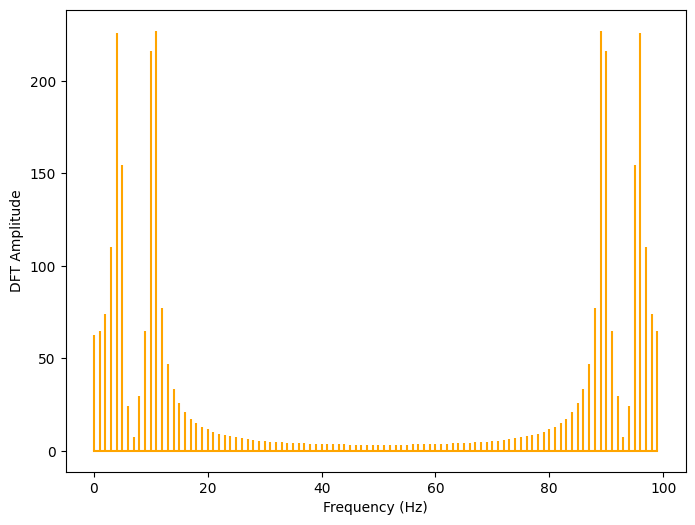

In [20]:
plt.figure(figsize = (8, 6))
plt.stem(freq, abs(X), 'orange',markerfmt=" ", basefmt="orange")
plt.xlabel('Frequency (Hz)')
plt.ylabel('DFT Amplitude')
plt.show()   

## Fourier Image Processing

In [112]:
from skimage.io import imread, imshow #importing dependencies
from skimage.color import rgb2gray
from skimage import color

Let us start by taking a look at the Fourier Transforms of some images to get an idea of what this means.

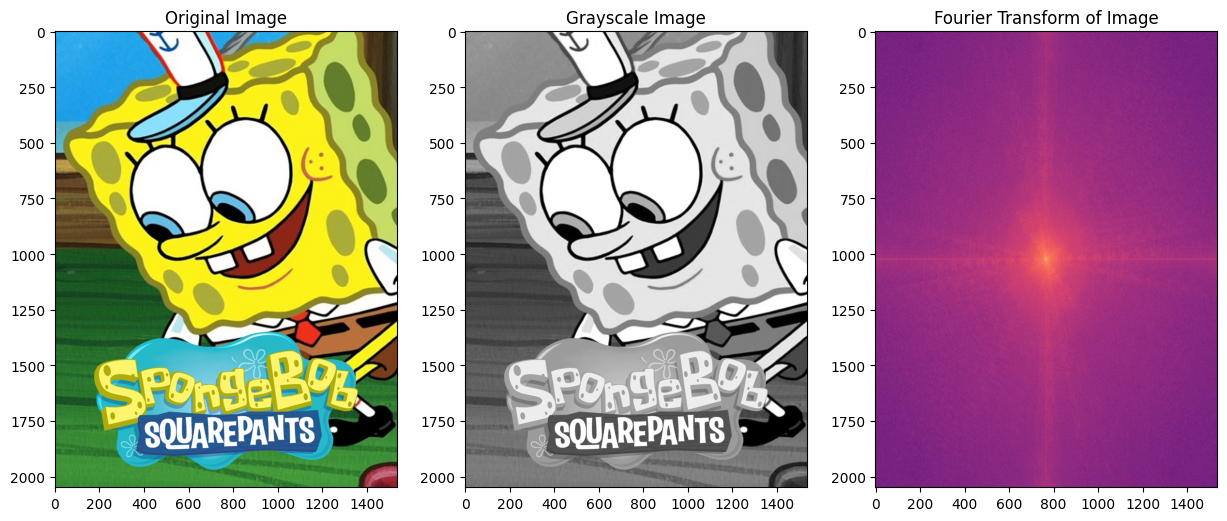

In [102]:
spongebob = imread('/home/sneha/Documents/MAT/spongebob.jpg')
spongebob_gray = rgb2gray(spongebob)
spongebob_fourier = np.fft.fftshift(np.fft.fft2(spongebob_gray))
fig, ax = plt.subplots(1,3,figsize=(15,15))
ax[0].imshow((spongebob))
ax[0].set_title('Original Image')
ax[1].imshow((spongebob_gray),cmap='gray')
ax[1].set_title('Grayscale Image')
ax[2].imshow(np.log(abs(spongebob_fourier)), cmap='magma')
ax[2].set_title('Fourier Transform of Image');
plt.show();

Strong lines represent edge effects. The cartoon image has very strong outlines with high contrast. This gives us the striking lines that slice our Fourier Transformed image.

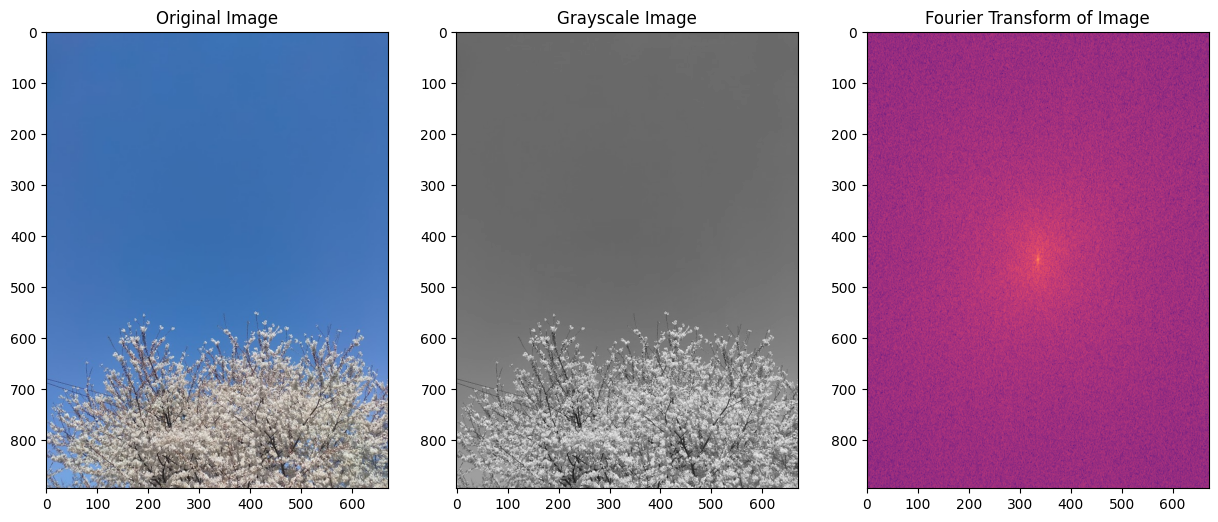

In [105]:
flowers = imread('/home/sneha/Documents/MAT/flowers.jpg')
flowers_gray = rgb2gray(flowers)
flowers_fourier = np.fft.fftshift(np.fft.fft2(flowers_gray))
fig, ax = plt.subplots(1,3,figsize=(15,15))
ax[0].imshow((flowers))
ax[0].set_title('Original Image')
ax[1].imshow((flowers_gray),cmap='gray')
ax[1].set_title('Grayscale Image')
ax[2].imshow(np.log(abs(flowers_fourier)), cmap='magma')
ax[2].set_title('Fourier Transform of Image');
plt.show();

This image has no jarring contrasts, unlike the image of Spongebob. Predictably, the Fourier Transform of this image does not have any sharp lines in it. 

### Editing an image with Fourier Transforms!

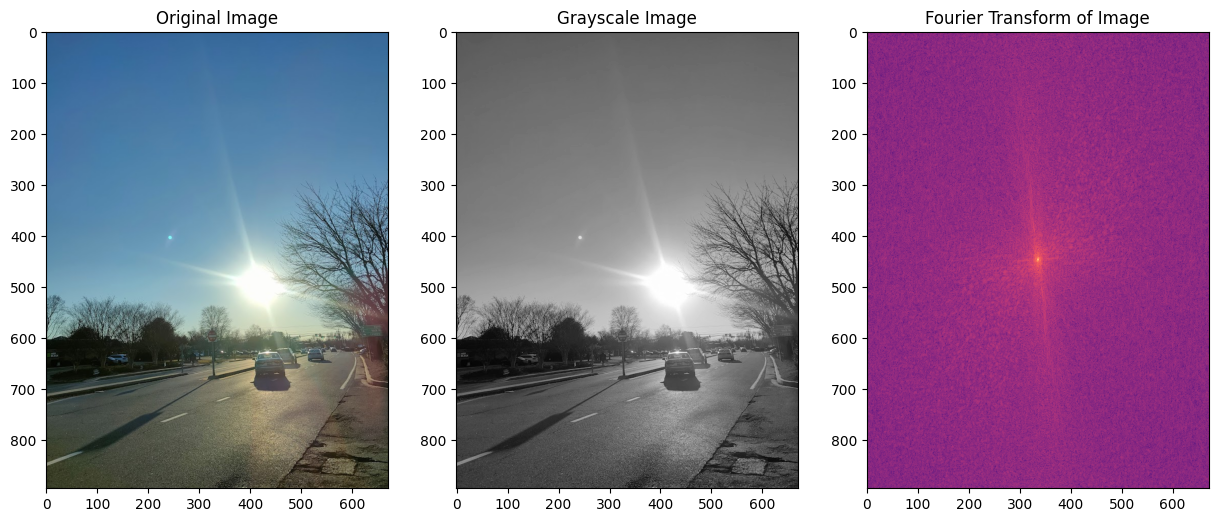

In [125]:
roadside = imread('/home/sneha/Documents/MAT/roadside.jpg')
roadside_gray = rgb2gray(roadside)
roadside_fourier = np.fft.fftshift(np.fft.fft2(roadside_gray))
fig, ax = plt.subplots(1,3,figsize=(15,15))
ax[0].imshow((roadside))
ax[0].set_title('Original Image')
ax[1].imshow((roadside_gray), cmap='gray')
ax[1].set_title('Grayscale Image');
ax[2].imshow(np.log(abs(roadside_fourier)), cmap='magma')
ax[2].set_title('Fourier Transform of Image');
plt.show();

Note the image above has an annoying sunflare. How can we reduce it? The sharp edges in the image manifest as straight lines in the Fourier Transform. Let us define a filter function to block these sharp edges in the fourier transform and see what happens. In order to do this, we will simply edit the entries in the array that forms the output of the Fourier transform.

<ipython-input-123-c2fec2c20222>:2: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  roadside_fourier = np.fft.fftshift(np.fft.fft2(rgb2gray(image)))


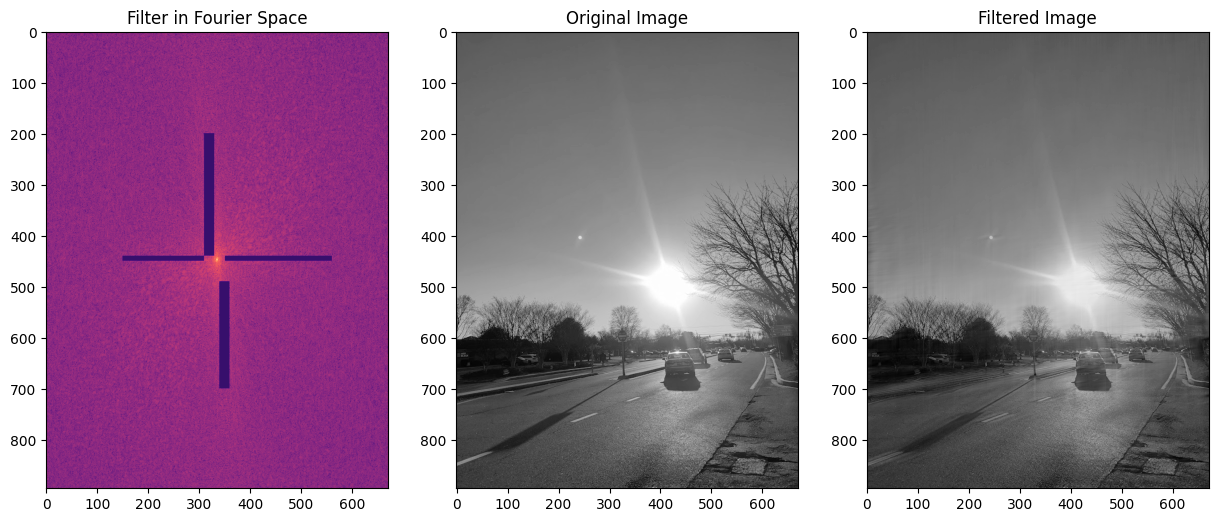

In [123]:
def filter(image, i):
    roadside_fourier = np.fft.fftshift(np.fft.fft2(rgb2gray(image)))    
    roadside_fourier[440:450, 150:310] = i#editing the entries in the fourier transformed image
    roadside_fourier[440:450,-320:-110] = i 
    roadside_fourier[200:440, 310:330] = i
    roadside_fourier[490:700, 340:360] = i 
    fig, ax = plt.subplots(1,3,figsize=(15,15))
    ax[0].imshow(np.log(abs(roadside_fourier)), cmap='magma')
    ax[0].set_title('Filter in Fourier Space')
    ax[1].imshow((image), cmap = 'gray')
    ax[1].set_title('Original Image');
    ax[2].imshow(abs(np.fft.ifft2(roadside_fourier)), cmap='gray')
    ax[2].set_title('Filtered Image');
filter(roadside_gray, 1) #entries in the array are replaced with this number.
plt.show();

Note how the sunburst is fainter in our filtered image! However, we have also lost resolution - the markings on the road, the shadows of the streetlight, all are blurrier in the second image. Try changing the input value of ``i`` in ``filter(image,i) `` and see how it affects the image!

You can try other effects using FFTs using [this](https://scipy-lectures.org/intro/scipy/auto_examples/solutions/plot_fft_image_denoise.html) resource. 